# Building Complex Models Using the Functional API

In [38]:
import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np, pandas as pd
import keras
import time

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [40]:
housing = fetch_california_housing()
# print(housing)

In [41]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target, random_state=42)

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

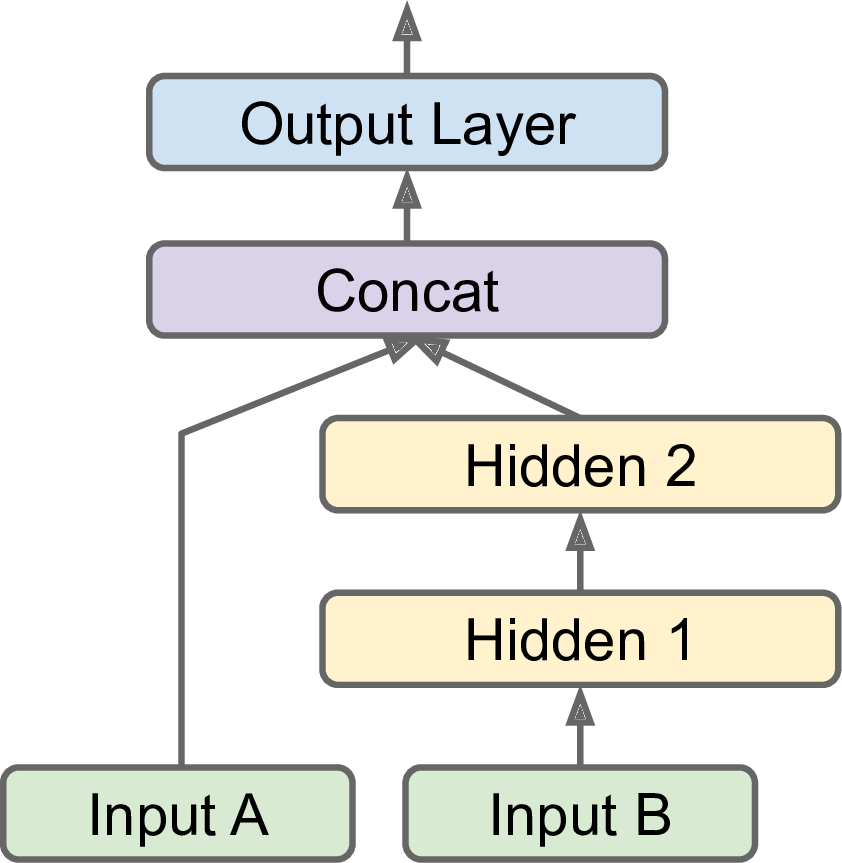

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [46]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [47]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.4188 - val_loss: 0.8856
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8280 - val_loss: 0.6974
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6544 - val_loss: 0.6528
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6185 - val_loss: 0.6315
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5980 - val_loss: 0.6166
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.6043
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5677 - val_loss: 0.5910
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5553 - val_loss: 0.5806
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5448 - val_loss: 0.5725
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5356 - val_loss: 0.5639

In [48]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print(mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5049
0.5049083232879639


In [49]:
X_new_A.shape, X_new_B.shape

((3, 5), (3, 6))

In [50]:
X_new_A

array([[-1.15781821, -0.28236708, -0.56715445, -0.18689263, -0.02898522],
       [-0.71101777,  0.11442326, -0.17627381,  0.25272706,  0.1250832 ],
       [-0.21234203,  1.86030079, -0.66637416,  0.23317199, -0.10201186]])

In [51]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

1/1 [==============================] - 0s 75ms/step


array([[0.54529613],
       [1.7188148 ],
       [2.878292  ]], dtype=float32)

In [52]:
mse(y_pred,y_test[:3]) 

2.0320017878373657

In [53]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict((X_new_A, X_new_B))
display(y_pred)

1/1 [==============================] - 0s 29ms/step


array([[0.54529613],
       [1.7188148 ],
       [2.878292  ]], dtype=float32)

In [54]:
mse(y_pred, y_test[:3])

2.0320017878373657

In [55]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [56]:
y_pred

array([[0.54529613],
       [1.7188148 ],
       [2.878292  ]], dtype=float32)

In [57]:
mse(y_pred, y_test[:3])

2.0320017878373657

In [58]:
model.evaluate((X_test_A[:3], X_test_B[:3]), y_test[:3])

1/1 [==============================] - 0s 26ms/step - loss: 2.0320


2.0320017337799072

# Saving and Restoring a Model

In [59]:
model.save("5_my_keras_model.keras")

In [60]:
loaded_model = keras.models.load_model("5_my_keras_model.keras")

In [61]:
loaded_model.evaluate((X_test_A[:3], X_test_B[:3]), y_test[:3])

1/1 [==============================] - 0s 97ms/step - loss: 2.0320


2.0320017337799072

In [62]:
from datetime import datetime
from time import strftime, localtime

In [63]:
datetime.now().strftime('%d-%b-%Y %I:%M %p')

'05-Dec-2023 10:58 PM'

In [64]:
time.time()

1701797299.6719568

In [65]:
strftime('%Y-%m-%d %H:%M:%S', localtime(time.time()))

'2023-12-05 22:58:19'